In [1]:
import torchvision

import detectron2
from detectron2.utils.logger import setup_logger
setup_logger()

# import some common libraries
import numpy as np
import sys
if '/opt/ros/kinetic/lib/python2.7/dist-packages' in sys.path:
    sys.path.remove('/opt/ros/kinetic/lib/python2.7/dist-packages')

import cv2
import random
import os
import numpy as np
import json
from detectron2.structures import BoxMode

# import some common detectron2 utilities
from detectron2 import model_zoo
from detectron2.engine import DefaultPredictor
from detectron2.config import get_cfg
from detectron2.utils.visualizer import Visualizer
from detectron2.data import MetadataCatalog

import base64
import io
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
from ast import literal_eval
from PIL import Image

pd.set_option('max_colwidth', 300)

from pycocotools.coco import COCO
import glob

In [2]:
categories = {'0':'Chair', '1':'Monitor', '2':'Desk'}
other_categories = {'file cabinet': 3, 'hat': 4, 'computer': 5, 'plushie': 6, 'stool': 7, 'file cabinent': 8, 'chair': 9, 'paper cup': 10, 'cardboard box': 11, 'hand sanitizer': 12, 'bags': 13, 'window': 14, 'stuffed animal': 15, 'giraffe plushie': 16, 'jacket': 17, 'bottle': 18, 'bag': 19, 'jar': 20, 'tissue box': 21, 'tissue': 22, 'cabinet': 23, 'back': 24, 'purse': 25, 'balloon': 26, 'drawer': 27, 'box lids': 28, 'backpack': 29, 'filing cabinet': 30, 'computer monitor': 31, 'paper': 32, 'white board': 33, 'dry erase board': 34, 'doll': 35, 'storage box': 36, 'cup': 37, 'box': 38, 'cereal': 39, 'inflated unicorn': 40, 'protein powder container': 41, 'clothing': 42, 'printer': 43, 'toy unicorn': 44, 'towel': 45, 'blow up unicorn': 46, 'book': 47, 'coat rack': 48, 'couch': 49, 'shoe': 50, 'luggage': 51, 'garbage can': 52, 'door': 53, 'fire hose': 54, 'unicorn': 55, 'inflatable floaty': 56, 'antenna': 57, 'headphones': 58, 'shirt': 59}

In [3]:
ssids = {'backpack': 0,
 'bag': 1,
 'unicorn plushie': 2,
 'book': 3,
 'bottle': 4,
 'cardboard box': 5,
 'file cabinet': 6,
 'cereal': 7,
 'chair': 8,
 'clothing': 9,
 'coat rack': 10,
 'monitor': 11,
 'couch': 12,
 'cup': 13,
 'desk': 14,
 'doll': 15,
 'drawer': 16,
 'dry erase board': 17,
 'fire hose': 18,
 'giraffe plushie': 19,
 'hand sanitizer': 20,
 'hat': 21,
 'headphones': 22,
 'jacket': 23,
 'jar': 24,
 'luggage': 25,
 'paper': 26,
 'paper cup': 27,
 'plushie': 28,
 'protein powder container': 29,
 'purse': 30,
 'shirt': 31,
 'shoe': 32,
 'stool': 33,
 'stuffed animal': 34,
 'tissues': 35,
 'window': 36,
 'person': 37}

## Detectron2 Training Code

In [4]:
import random
from detectron2.data import DatasetCatalog, MetadataCatalog
DatasetCatalog.clear()

# other_categories = {'file cabinet': 3, 'hat': 4, 'computer': 5, 'plushie': 6, 'stool': 7, 'file cabinent': 8, 'chair': 9, 'paper cup': 10, 'cardboard box': 11, 'hand sanitizer': 12, 'bags': 13, 'window': 14, 'stuffed animal': 15, 'giraffe plushie': 16, 'jacket': 17, 'bottle': 18, 'bag': 19, 'jar': 20, 'tissue box': 21, 'tissue': 22, 'cabinet': 23, 'back': 24, 'purse': 25, 'balloon': 26, 'drawer': 27, 'box lids': 28, 'backpack': 29, 'filing cabinet': 30, 'computer monitor': 31, 'paper': 32, 'white board': 33, 'dry erase board': 34, 'doll': 35, 'storage box': 36, 'cup': 37, 'box': 38, 'cereal': 39, 'inflated unicorn': 40, 'protein powder container': 41, 'clothing': 42, 'printer': 43, 'toy unicorn': 44, 'towel': 45, 'blow up unicorn': 46, 'book': 47, 'coat rack': 48, 'couch': 49, 'shoe': 50, 'luggage': 51, 'garbage can': 52, 'door': 53, 'fire hose': 54, 'unicorn': 55, 'inflatable floaty': 56, 'antenna': 57, 'headphones': 58, 'shirt': 59}

img_dir = '/home/locobotm/images2/'
botfiles = glob.glob(img_dir+'botcapture*.jpg')
random.shuffle(botfiles)
files = glob.glob(img_dir+'[!botcapture]*.jpg')
random.shuffle(files)

def slc(files, set_name):
    l = int(0.1*len(files))
    return files[-l:] if set_name == 'Val' else files[:-l]

number of files 215, train_size 269, val_size 29
38
number of files 269
<class 'numpy.ndarray'> (320, 213, 3)


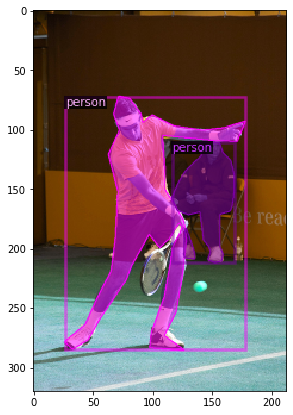

<class 'numpy.ndarray'> (237, 320, 3)


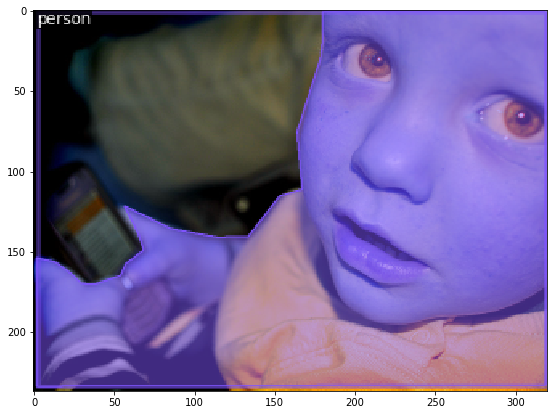

<class 'numpy.ndarray'> (256, 320, 3)


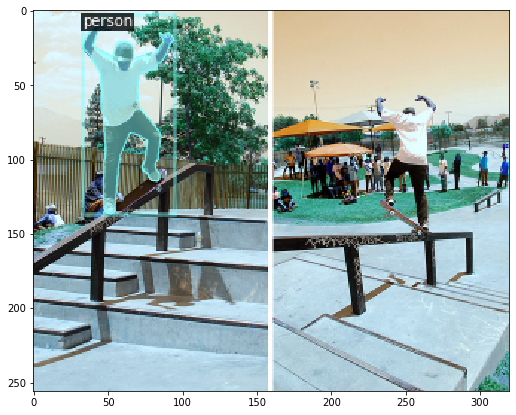

<class 'numpy.ndarray'> (240, 320, 3)


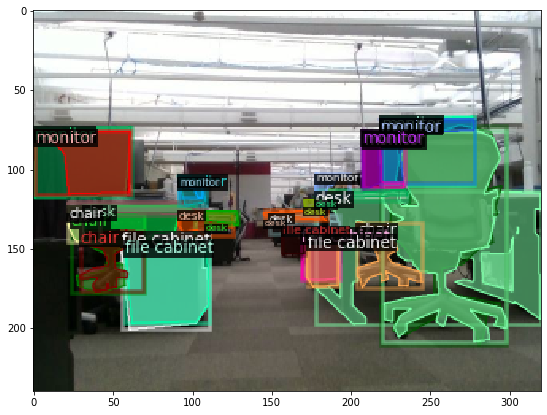

<class 'numpy.ndarray'> (238, 320, 3)


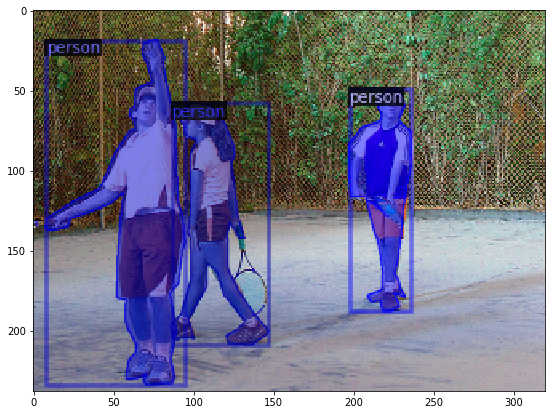

[03/26 16:00:19 d2.engine.defaults]: Model:
GeneralizedRCNN(
  (backbone): FPN(
    (fpn_lateral2): Conv2d(256, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output2): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (fpn_lateral3): Conv2d(512, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output3): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (fpn_lateral4): Conv2d(1024, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output4): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (fpn_lateral5): Conv2d(2048, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output5): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (top_block): LastLevelMaxPool()
    (bottom_up): ResNet(
      (stem): BasicStem(
        (conv1): Conv2d(
          3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False
          (norm): FrozenBatchNorm2d(num_features=64, eps=1e-05)
        )
      )
      (res

'roi_heads.box_predictor.cls_score.weight' has shape (1231, 1024) in the checkpoint but (39, 1024) in the model! Skipped.
'roi_heads.box_predictor.cls_score.bias' has shape (1231,) in the checkpoint but (39,) in the model! Skipped.
'roi_heads.box_predictor.bbox_pred.weight' has shape (4920, 1024) in the checkpoint but (152, 1024) in the model! Skipped.
'roi_heads.box_predictor.bbox_pred.bias' has shape (4920,) in the checkpoint but (152,) in the model! Skipped.
'roi_heads.mask_head.predictor.weight' has shape (1230, 256, 1, 1) in the checkpoint but (38, 256, 1, 1) in the model! Skipped.
'roi_heads.mask_head.predictor.bias' has shape (1230,) in the checkpoint but (38,) in the model! Skipped.


[03/26 16:00:20 d2.engine.train_loop]: Starting training from iteration 0
[03/26 16:00:28 d2.utils.events]:  eta: 0:01:22  iter: 19  total_loss: 4.596  loss_cls: 3.299  loss_box_reg: 0.540  loss_mask: 0.677  loss_rpn_cls: 0.088  loss_rpn_loc: 0.036  time: 0.3622  data_time: 0.0138  lr: 0.000100  max_mem: 3697M
[03/26 16:00:35 d2.utils.events]:  eta: 0:01:15  iter: 39  total_loss: 2.487  loss_cls: 1.120  loss_box_reg: 0.558  loss_mask: 0.545  loss_rpn_cls: 0.101  loss_rpn_loc: 0.049  time: 0.3648  data_time: 0.0091  lr: 0.000200  max_mem: 3697M
[03/26 16:00:43 d2.utils.events]:  eta: 0:01:08  iter: 59  total_loss: 1.700  loss_cls: 0.521  loss_box_reg: 0.497  loss_mask: 0.457  loss_rpn_cls: 0.067  loss_rpn_loc: 0.036  time: 0.3650  data_time: 0.0097  lr: 0.000300  max_mem: 3697M
[03/26 16:00:50 d2.utils.events]:  eta: 0:01:02  iter: 79  total_loss: 1.077  loss_cls: 0.208  loss_box_reg: 0.527  loss_mask: 0.361  loss_rpn_cls: 0.065  loss_rpn_loc: 0.022  time: 0.3677  data_time: 0.0098  lr:

Reusing TensorBoard on port 6006 (pid 4422), started 0:03:10 ago. (Use '!kill 4422' to kill it.)

In [5]:
val_size = int(0.1*len(files))
val_files = files[-val_size:]
train_files = slc(botfiles, 'Train') + slc(files, 'Train')
val_files = slc(botfiles, 'Val') + slc(files, 'Val')

print("number of files {}, train_size {}, val_size {}".format(len(files), len(train_files), len(val_files)))

def get_dataset_dicts(set_name):
#     json_file = os.path.join("other_annotations2.json")
    json_file = 'coco_loco_annotations.json'

    with open(json_file) as f:
        imgs_anns = json.load(f)
#         print(imgs_anns[0])

    dataset_dicts = []
    files = train_files if set_name == 'train' else val_files
    print("number of files {}".format(len(files)))
    for idx, filepath in enumerate(files):
        record = {}
        height, width = cv2.imread(filepath).shape[:2]
        record["file_name"] = filepath
        record["image_id"] = idx
        record["height"] = height
        record["width"] = width
        filename = filepath.split('/')[-1]
        objs = []
        keep_rec = False
        for _, anno in enumerate(imgs_anns):
#             print('anno {}'.format(anno))
            if anno['image_id'] == filename or str(anno['image_id'])+'.jpg' == filename:
                keep_rec = True
                obj = {
                    "bbox": anno['bbox'],
                    "bbox_mode": BoxMode.XYXY_ABS,
                    "segmentation": anno['segmentation'],
                    "category_id": anno['category_id'],
                    "iscrowd": 0
                }
                objs.append(obj)

        record["annotations"] = objs
        if keep_rec:
            dataset_dicts.append(record)
    return dataset_dicts
    
# cat = list(categories.values()) + list(other_categories.keys())
# print(len(cat), other_categories)

prefix = "detect8_"
train_data = prefix+'train'
test_data = prefix+'val'

for d in ["train", "val"]:
    DatasetCatalog.register(prefix+d, lambda d = d: get_dataset_dicts(d))
    MetadataCatalog.get(prefix+d).set(thing_classes=list(ssids.keys()))

x = len(MetadataCatalog.get(train_data).get("thing_classes"))
print(x)

MetadataCatalog.get(train_data).get("thing_classes", None)

import matplotlib
matplotlib.rcParams['figure.figsize'] = (20, 7.0)
from detectron2.utils.visualizer import Visualizer
dataset_dicts = get_dataset_dicts('train')
for d in random.sample(dataset_dicts, 5):
#     print(d)
    img = cv2.imread(d["file_name"])
    visualizer = Visualizer(img[:, :, ::-1], metadata=MetadataCatalog.get(train_data), scale=0.5)
    vis = visualizer.draw_dataset_dict(d)
    img = vis.get_image()[:, :, ::-1]
    print(type(img), img.shape)
    plt.imshow(img)
    plt.show()
#     cv2.imshow("img", )

from detectron2.engine import DefaultTrainer
from detectron2.config import get_cfg

coco_yaml = "COCO-InstanceSegmentation/mask_rcnn_R_50_FPN_3x.yaml"
lvis_yaml = "LVIS-InstanceSegmentation/mask_rcnn_R_50_FPN_1x.yaml"
lvis_yaml2 = "LVIS-InstanceSegmentation/mask_rcnn_R_101_FPN_1x.yaml"
pano_yaml = "COCO-PanopticSegmentation/panoptic_fpn_R_50_3x.yaml"

cfg = get_cfg()
cfg.merge_from_file(model_zoo.get_config_file(lvis_yaml2))
cfg.DATASETS.TRAIN = (train_data,)
cfg.DATASETS.TEST = ()
cfg.DATALOADER.NUM_WORKERS = 2
cfg.MODEL.WEIGHTS = model_zoo.get_checkpoint_url(lvis_yaml2)  # Let training initialize from model zoo
cfg.SOLVER.IMS_PER_BATCH = 2
cfg.SOLVER.BASE_LR = 0.005  # pick a good LR
cfg.SOLVER.MAX_ITER = 250    # 300 iterations seems good enough for this toy dataset; you may need to train longer for a practical dataset
cfg.MODEL.ROI_HEADS.BATCH_SIZE_PER_IMAGE = 128   # faster, and good enough for this toy dataset (default: 512)
cfg.MODEL.ROI_HEADS.NUM_CLASSES = len(MetadataCatalog.get(train_data).get("thing_classes"))  # only has one class (ballon)

os.makedirs(cfg.OUTPUT_DIR, exist_ok=True)
trainer = DefaultTrainer(cfg) 
trainer.resume_or_load(resume=False)
trainer.train()

# Look at training curves in tensorboard:
%load_ext tensorboard
%tensorboard --logdir output

number of files 29


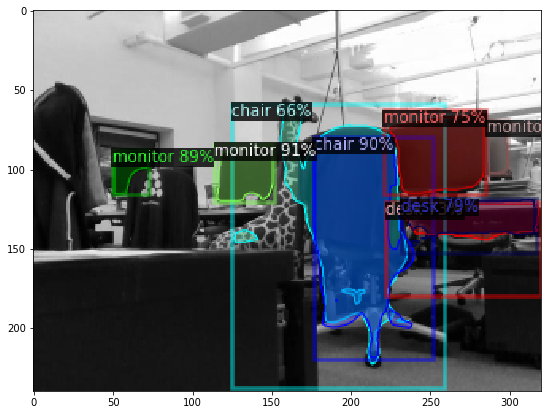

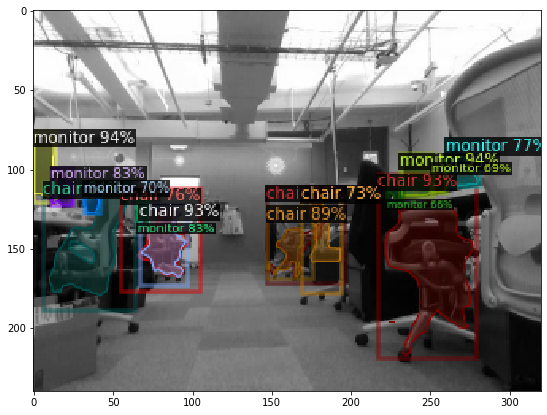

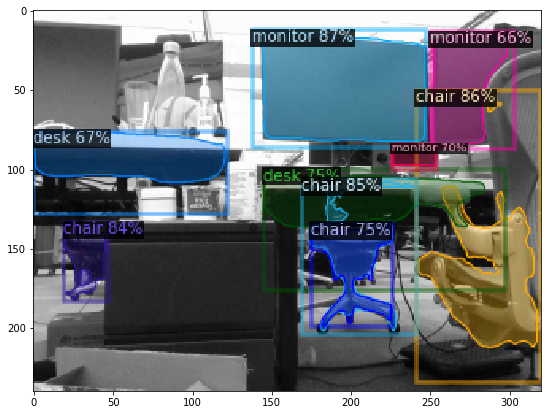

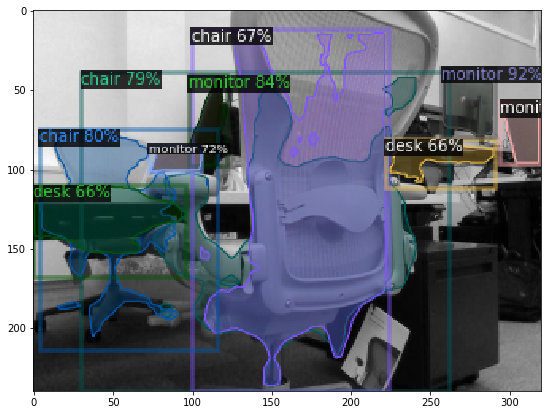

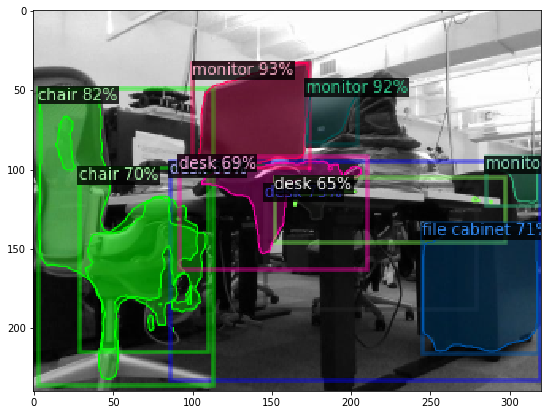

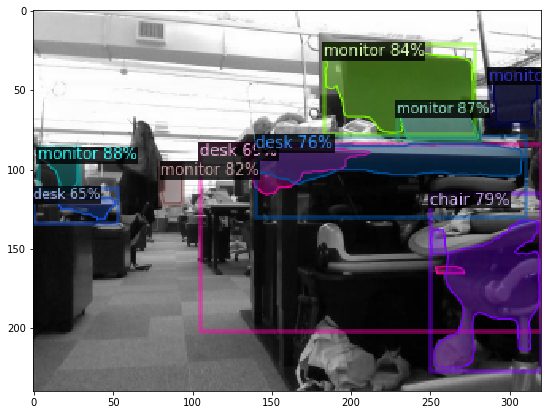

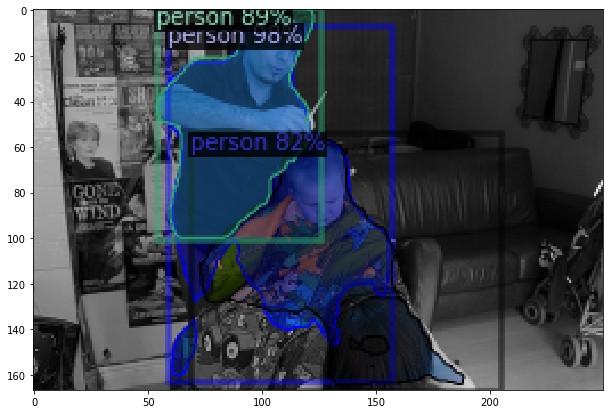

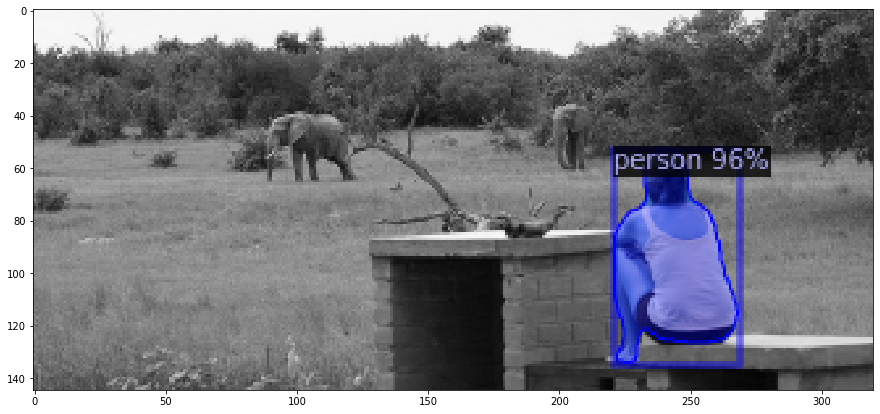

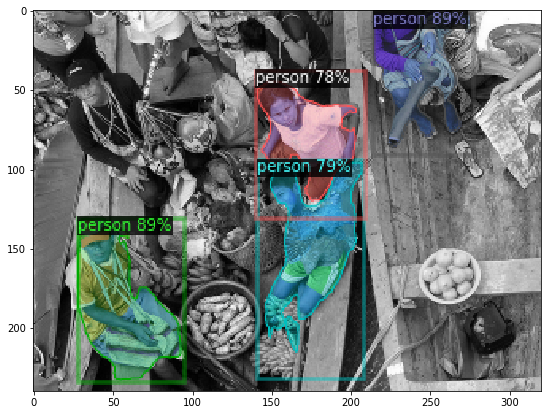

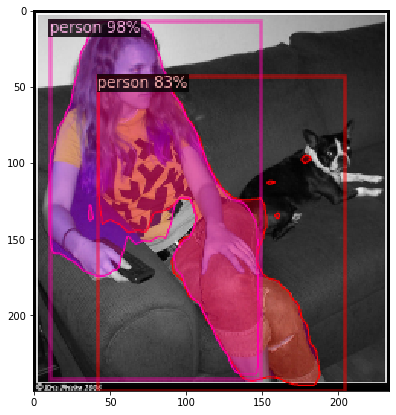

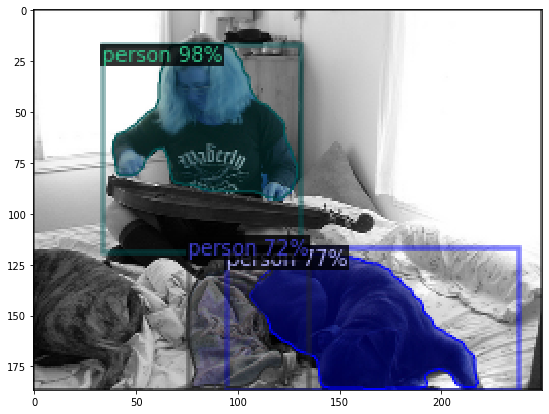

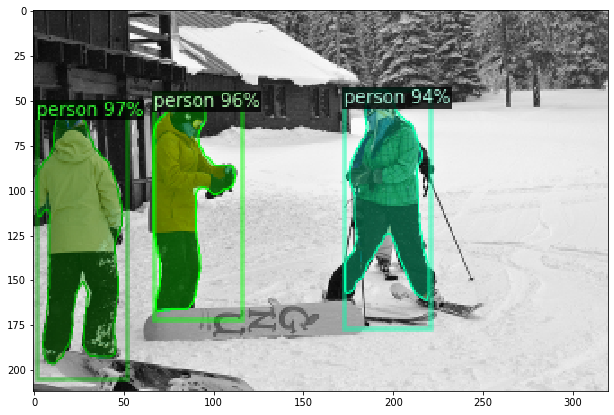

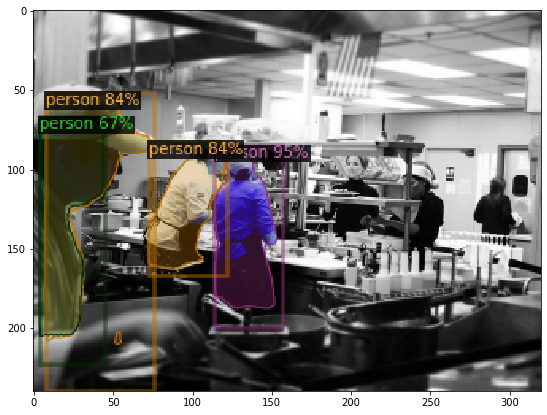

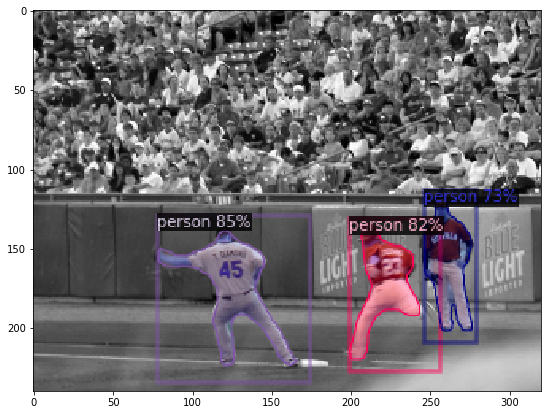

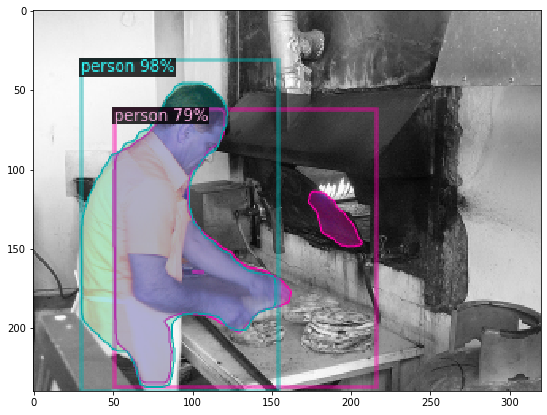

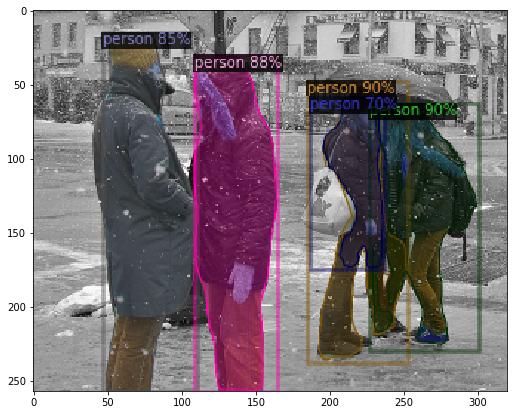

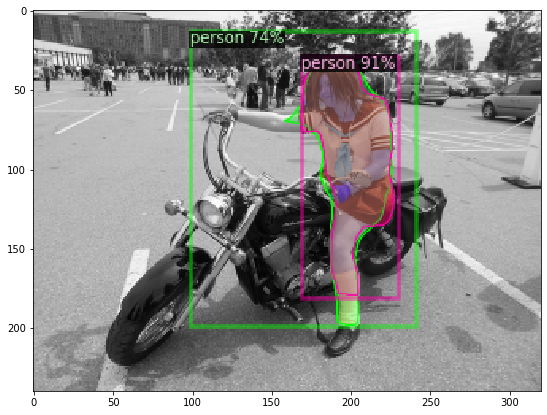

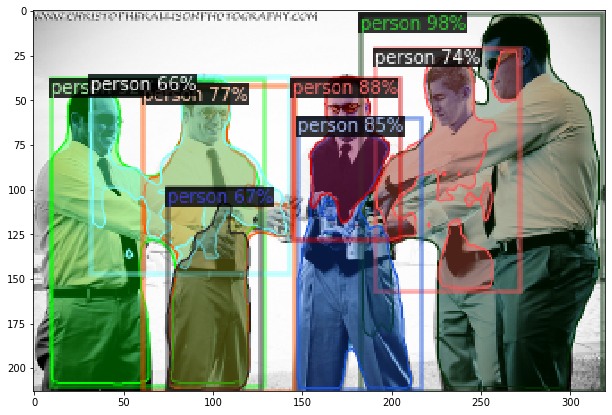

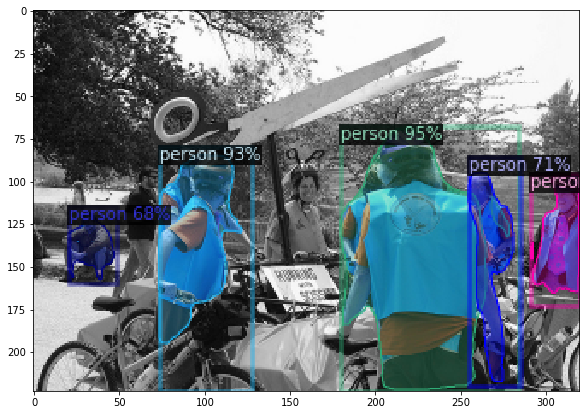

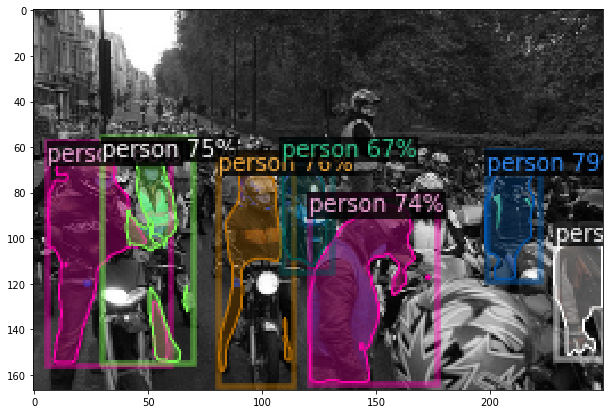

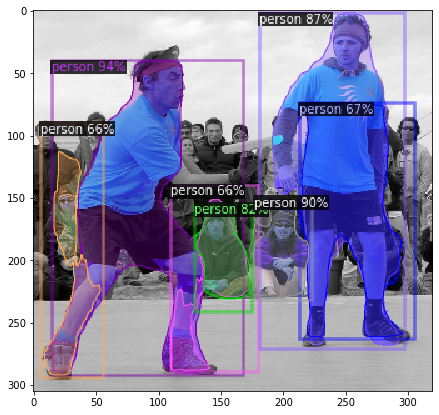

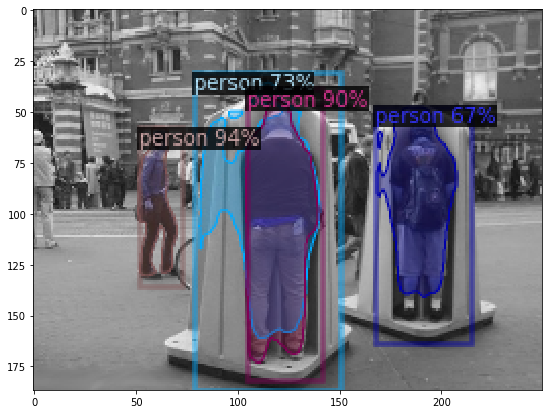

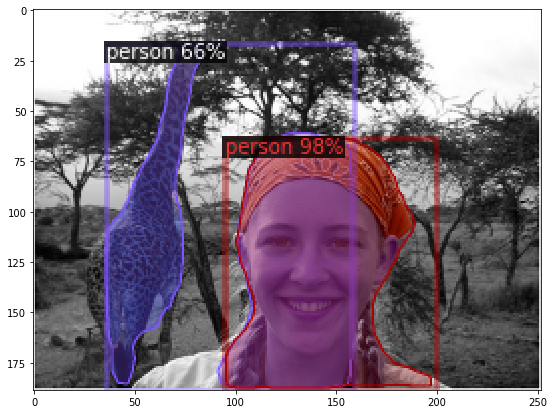

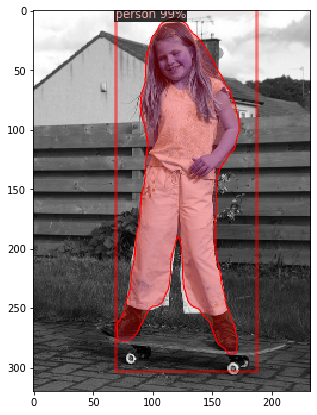

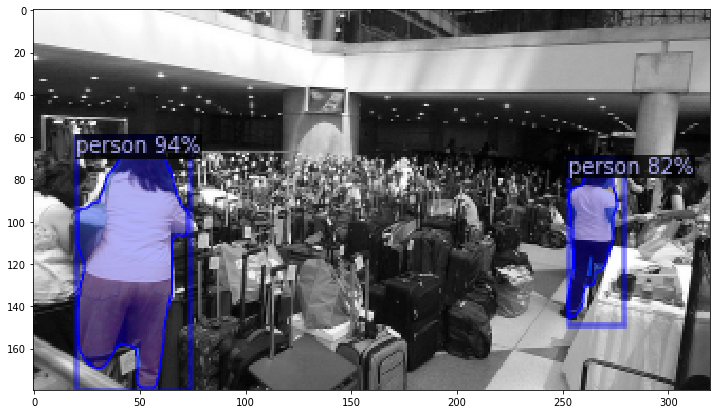

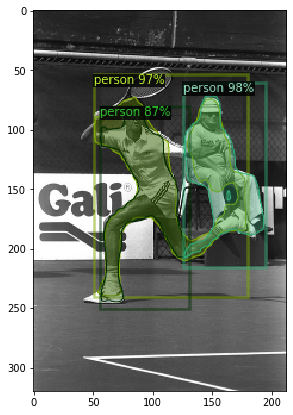

In [6]:
test_data = prefix+'val'

cfg.MODEL.WEIGHTS = os.path.join(cfg.OUTPUT_DIR, "model_final.pth")
cfg.MODEL.ROI_HEADS.SCORE_THRESH_TEST = 0.65   # set the testing threshold for this model
cfg.DATASETS.TEST = (test_data, )
predictor = DefaultPredictor(cfg)

from detectron2.utils.visualizer import ColorMode

def visualize(filename):
    im = cv2.imread(filename)
    outputs = predictor(im)
    v = Visualizer(im[:, :, ::-1],
                   metadata=MetadataCatalog.get(train_data), 
                   scale=0.5, 
                   instance_mode=ColorMode.IMAGE_BW   # remove the colors of unsegmented pixels
    )
    v = v.draw_instance_predictions(outputs["instances"].to("cpu"))
    plt.imshow(v.get_image()[:, :, ::-1])
    plt.show()

dataset_dicts = get_dataset_dicts('val')

for d in dataset_dicts:
#     print(d['file_name'])
#     if 'botcapture' in d['file_name']:
        visualize(d['file_name'])

In [7]:
cfg = get_cfg()
cfg.SOLVER

CfgNode({'LR_SCHEDULER_NAME': 'WarmupMultiStepLR', 'MAX_ITER': 40000, 'BASE_LR': 0.001, 'MOMENTUM': 0.9, 'WEIGHT_DECAY': 0.0001, 'WEIGHT_DECAY_NORM': 0.0, 'GAMMA': 0.1, 'STEPS': (30000,), 'WARMUP_FACTOR': 0.001, 'WARMUP_ITERS': 1000, 'WARMUP_METHOD': 'linear', 'CHECKPOINT_PERIOD': 5000, 'IMS_PER_BATCH': 16, 'BIAS_LR_FACTOR': 1.0, 'WEIGHT_DECAY_BIAS': 0.0001, 'CLIP_GRADIENTS': CfgNode({'ENABLED': False, 'CLIP_TYPE': 'value', 'CLIP_VALUE': 1.0, 'NORM_TYPE': 2.0})})

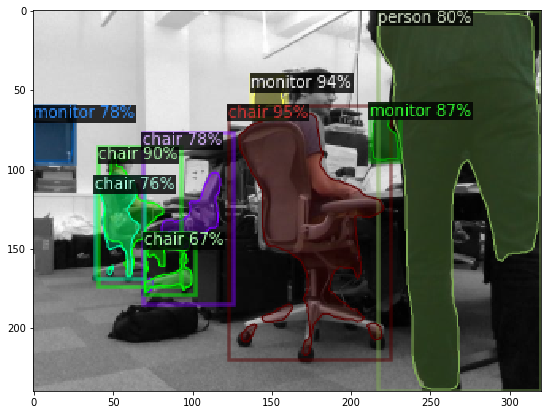

In [8]:
visualize('/home/locobotm/images2/botcapture_wpkJVA.jpg')

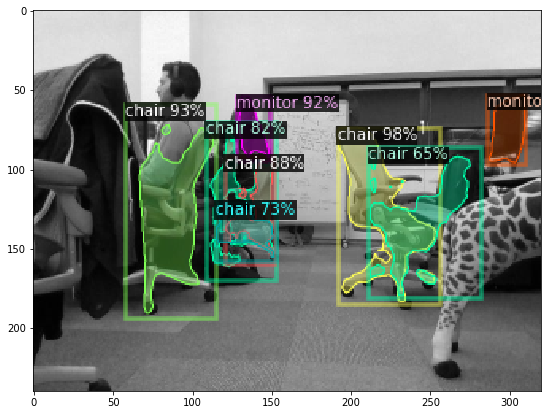

In [9]:
visualize('/home/locobotm/images2/botcapture_7c_rVj.jpg')

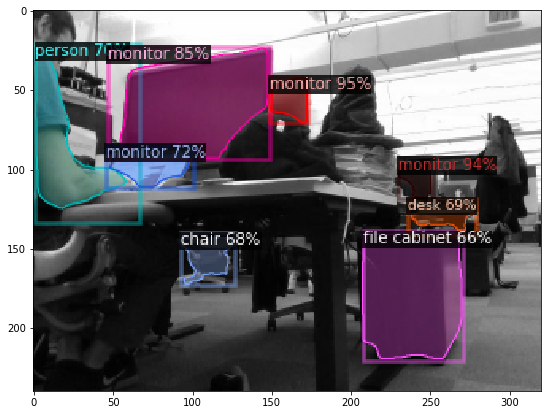

In [10]:
visualize('/home/locobotm/images2/botcapture_1FZxE7.jpg')